In [109]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/road-accident-severity-in-india/Road.csv


In [110]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [111]:
df = pd.read_csv('/kaggle/input/road-accident-severity-in-india/Road.csv')

In [112]:
df.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


In [113]:
df.shape

(12316, 32)

In [114]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            11575 non-null  object
 5   Vehicle_driver_relation      11737 non-null  object
 6   Driving_experience           11487 non-null  object
 7   Type_of_vehicle              11366 non-null  object
 8   Owner_of_vehicle             11834 non-null  object
 9   Service_year_of_vehicle      8388 non-null   object
 10  Defect_of_vehicle            7889 non-null   object
 11  Area_accident_occured        12077 non-null  object
 12  Lanes_or_Medians             11931 non-null  object
 13  Road_allignment              12

#  **Nan Value**

In [115]:
df.isna().sum()

Time                              0
Day_of_week                       0
Age_band_of_driver                0
Sex_of_driver                     0
Educational_level               741
Vehicle_driver_relation         579
Driving_experience              829
Type_of_vehicle                 950
Owner_of_vehicle                482
Service_year_of_vehicle        3928
Defect_of_vehicle              4427
Area_accident_occured           239
Lanes_or_Medians                385
Road_allignment                 142
Types_of_Junction               887
Road_surface_type               172
Road_surface_conditions           0
Light_conditions                  0
Weather_conditions                0
Type_of_collision               155
Number_of_vehicles_involved       0
Number_of_casualties              0
Vehicle_movement                308
Casualty_class                    0
Sex_of_casualty                   0
Age_band_of_casualty              0
Casualty_severity                 0
Work_of_casuality           

# **EDA**

# **Countplot of Defect of Vehicle**

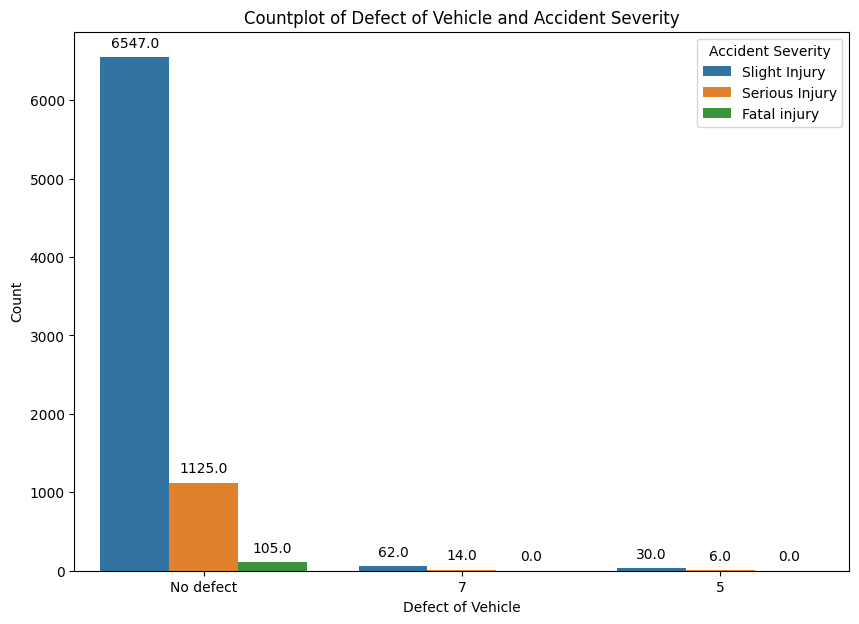

In [116]:
# plt.figure(figsize=(12,10))
# sns.countplot(x='Defect_of_vehicle',hue='Accident_severity',data=df)
# plt.title('Countplot of Defect of Vehicle and Accident_severity')
# plt.show()
plt.figure(figsize=(10,7))
ax = sns.countplot(x='Defect_of_vehicle', hue='Accident_severity', data=df)

# Adding labels on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 10), 
                textcoords='offset points')

plt.title('Countplot of Defect of Vehicle and Accident Severity')
plt.xlabel('Defect of Vehicle')
plt.ylabel('Count')
plt.legend(title='Accident Severity')
plt.show()


In [117]:
df.drop('Defect_of_vehicle',axis=1,inplace=True) 

# **Countplot of Service Year of Vehicle**

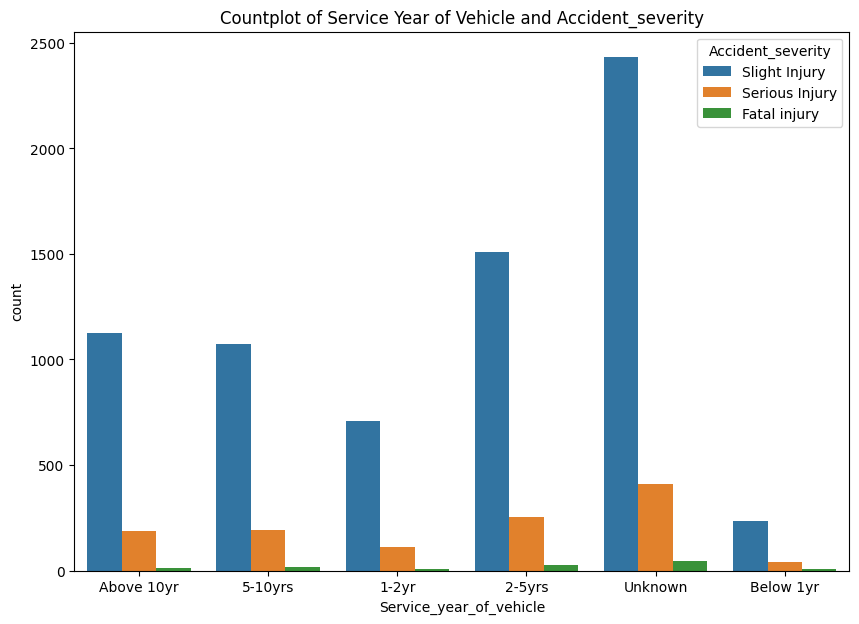

In [118]:
plt.figure(figsize=(10,7))
sns.countplot(x='Service_year_of_vehicle',hue='Accident_severity',data=df)
plt.title('Countplot of Service Year of Vehicle and Accident_severity')
plt.show()

In [119]:
df['Service_year_of_vehicle']=df['Service_year_of_vehicle'].fillna(df['Service_year_of_vehicle'].mode()[0])

In [120]:
df.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,Unknown,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,Unknown,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


# **Countplot of Work of Casuality**

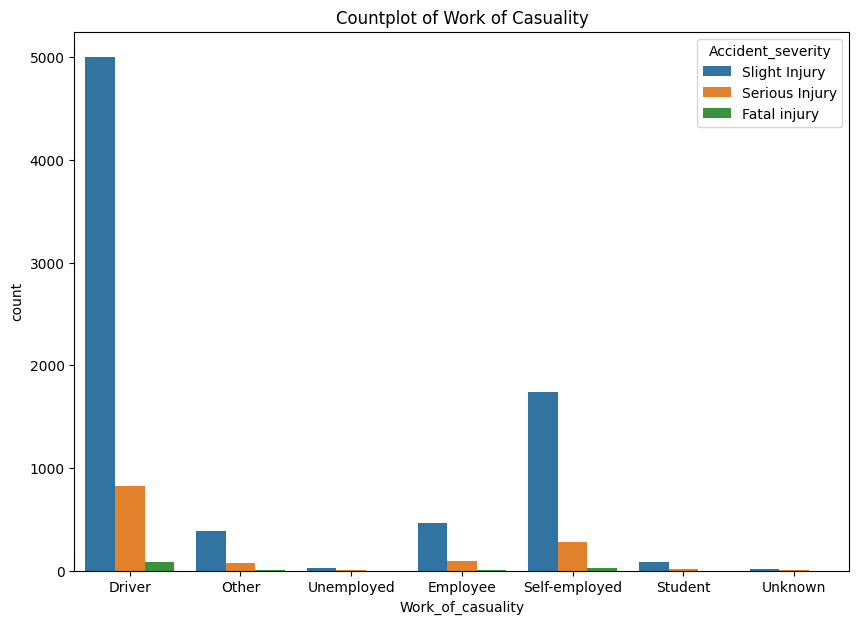

In [121]:
plt.figure(figsize=(10,7))
sns.countplot(x='Work_of_casuality',hue='Accident_severity',data=df)
plt.title("Countplot of Work of Casuality")
plt.show()

In [123]:
df['Work_of_casuality'].fillna('Unknown',inplace=True)

In [124]:
df.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,Unknown,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,Unknown,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,Unknown,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,Unknown,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,Unknown,NaN,Not a Pedestrian,Overtaking,Slight Injury


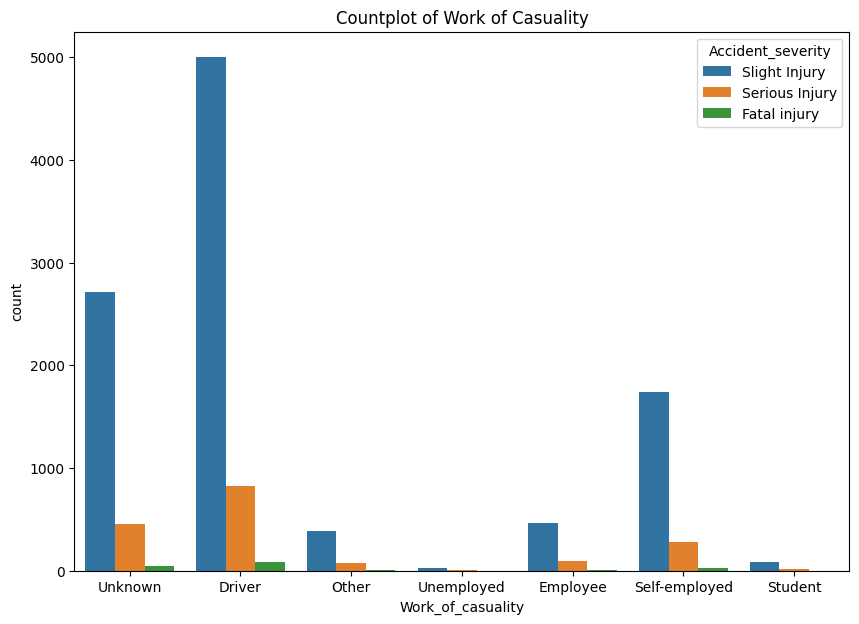

In [125]:
plt.figure(figsize=(10,7))
sns.countplot(x='Work_of_casuality',hue='Accident_severity',data=df)
plt.title("Countplot of Work of Casuality")
plt.show()

# **Countplot of Fitness of Casuality**

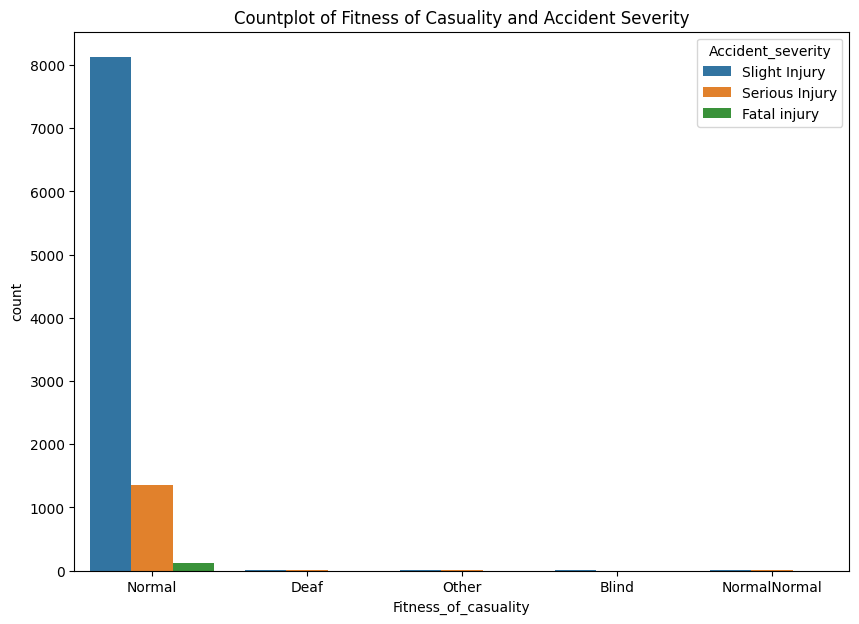

In [126]:
plt.figure(figsize=(10,7))
sns.countplot(x='Fitness_of_casuality',hue='Accident_severity',data=df)
plt.title("Countplot of Fitness of Casuality and Accident Severity")
plt.show()

In [127]:
df.drop('Fitness_of_casuality',axis=1,inplace=True)

# After Visualizing data we saw in all the above bar plot that slight injuries are more than serious and fatal injuries

In [128]:
df.dropna(inplace=True)

In [129]:
df.columns

Index(['Time', 'Day_of_week', 'Age_band_of_driver', 'Sex_of_driver',
       'Educational_level', 'Vehicle_driver_relation', 'Driving_experience',
       'Type_of_vehicle', 'Owner_of_vehicle', 'Service_year_of_vehicle',
       'Area_accident_occured', 'Lanes_or_Medians', 'Road_allignment',
       'Types_of_Junction', 'Road_surface_type', 'Road_surface_conditions',
       'Light_conditions', 'Weather_conditions', 'Type_of_collision',
       'Number_of_vehicles_involved', 'Number_of_casualties',
       'Vehicle_movement', 'Casualty_class', 'Sex_of_casualty',
       'Age_band_of_casualty', 'Casualty_severity', 'Work_of_casuality',
       'Pedestrian_movement', 'Cause_of_accident', 'Accident_severity'],
      dtype='object')

# **Count Plot of Sex of Driver**

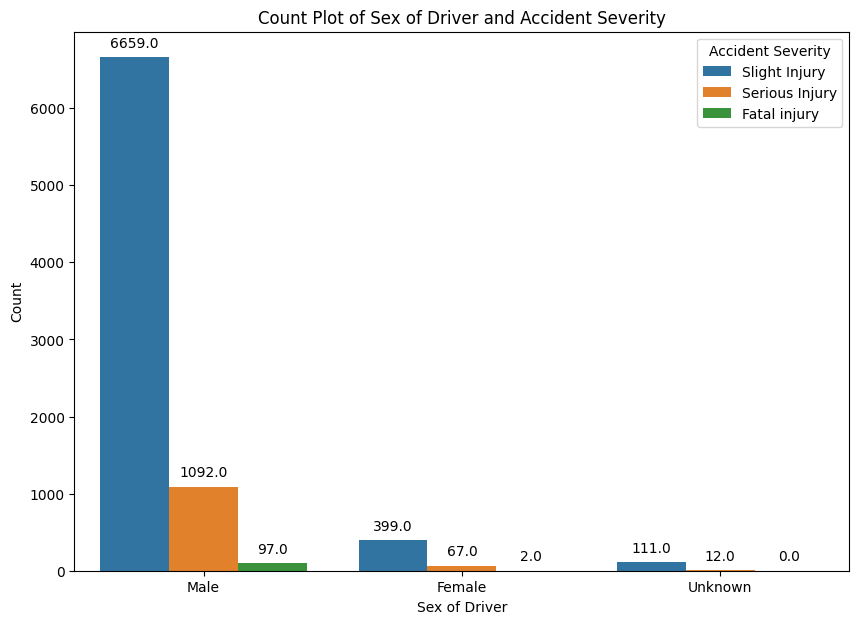

In [130]:

plt.figure(figsize=(10, 7))
ax = sns.countplot(x='Sex_of_driver', hue='Accident_severity', data=df)

# Adding labels on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 10), 
                textcoords='offset points')

plt.title('Count Plot of Sex of Driver and Accident Severity')
plt.xlabel('Sex of Driver')
plt.ylabel('Count')
plt.legend(title='Accident Severity')
plt.show()

# **From the above plot we saw that males are more prone to accidents then females**

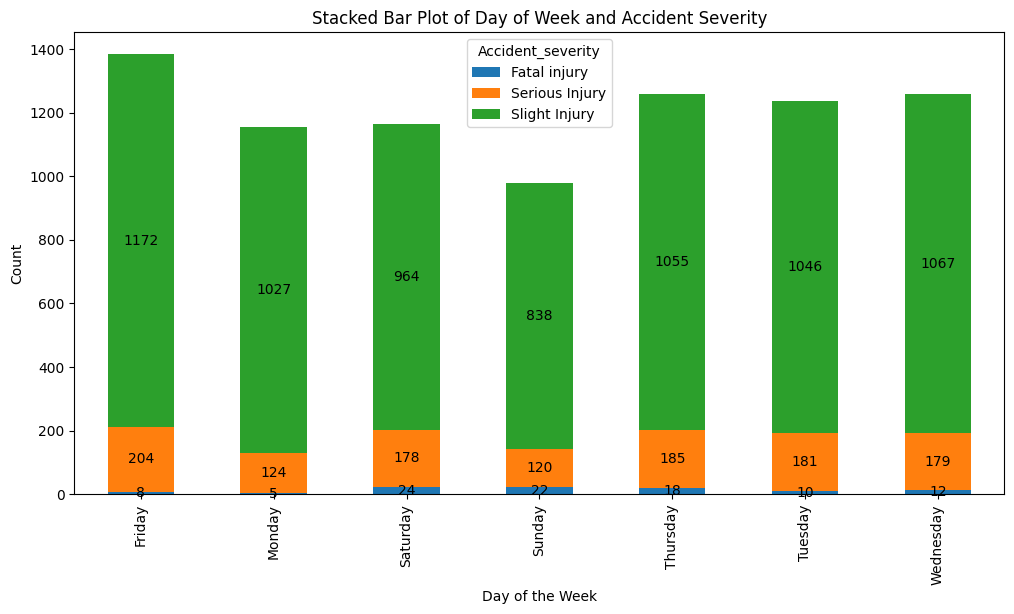

In [131]:
cross_tab = pd.crosstab(df['Day_of_week'], df['Accident_severity'])

ax = cross_tab.plot(kind='bar', stacked=True, figsize=(12, 6))

# Adding labels on top of each segment
for container in ax.containers:
    ax.bar_label(container, label_type='center')

plt.title('Stacked Bar Plot of Day of Week and Accident Severity')
plt.xlabel('Day of the Week')
plt.ylabel('Count')

plt.show()

In [132]:
pd.crosstab(df['Day_of_week'], df['Accident_severity'])

Accident_severity,Fatal injury,Serious Injury,Slight Injury
Day_of_week,,,
Friday,8,204,1172
Monday,5,124,1027
Saturday,24,178,964
Sunday,22,120,838
Thursday,18,185,1055
Tuesday,10,181,1046
Wednesday,12,179,1067


# *Friday has the most accidents*

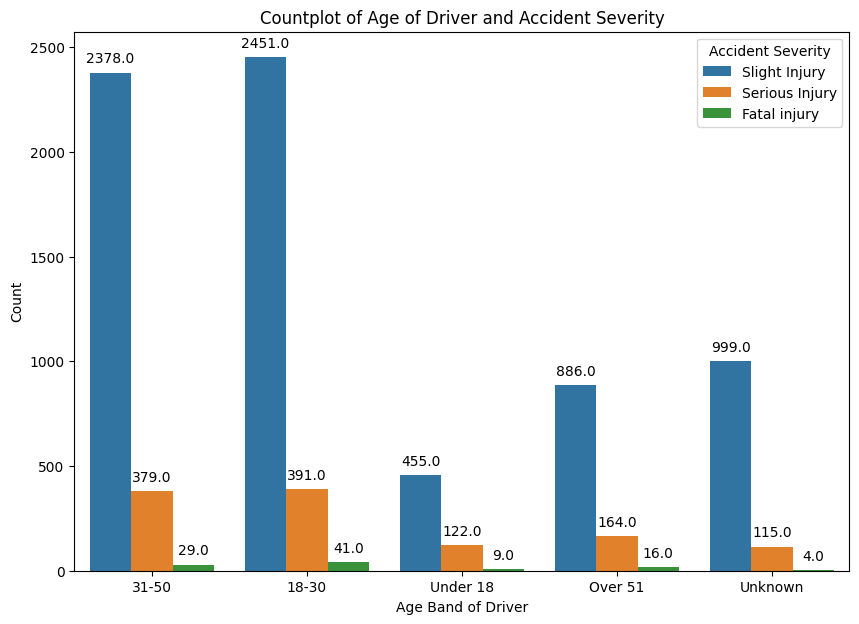

In [133]:
plt.figure(figsize=(10, 7))
ax = sns.countplot(x='Age_band_of_driver', hue='Accident_severity', data=df)

# Adding labels on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 10), 
                textcoords='offset points')

plt.title('Countplot of Age of Driver and Accident Severity')
plt.xlabel('Age Band of Driver')
plt.ylabel('Count')
plt.legend(title='Accident Severity')
plt.show()

# **In the above plot we found that 18 to 30 Age People are more prone to accidents **

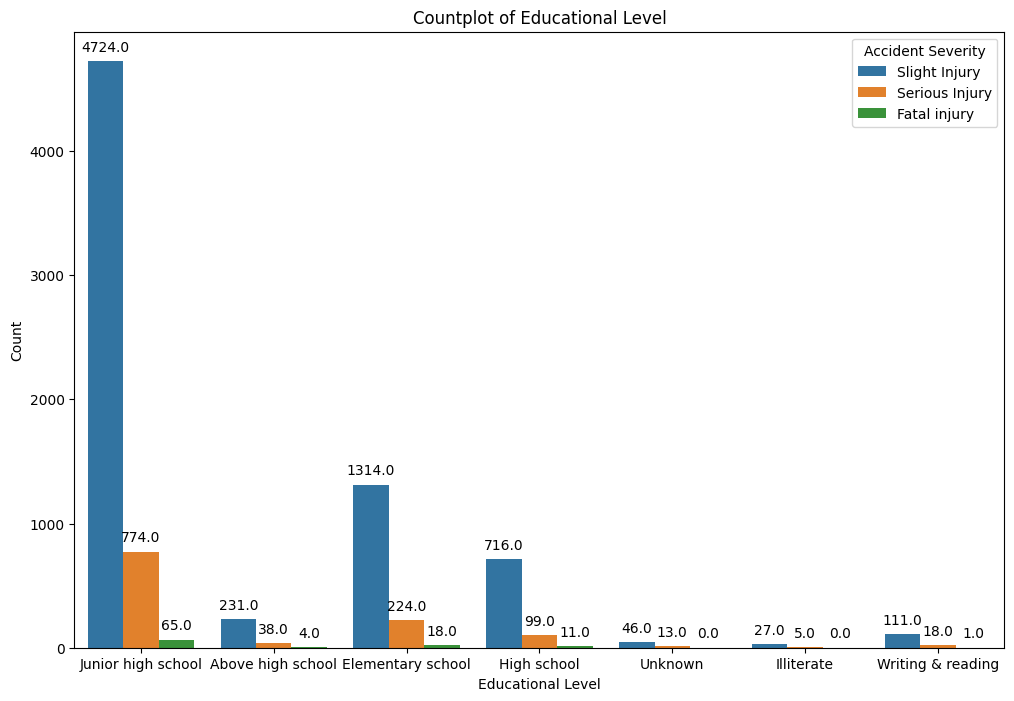

In [134]:
plt.figure(figsize=(12, 8))
ax = sns.countplot(x='Educational_level', hue='Accident_severity', data=df)

# Adding labels on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 10), 
                textcoords='offset points')

plt.title('Countplot of Educational Level')
plt.xlabel('Educational Level')
plt.ylabel('Count')
plt.legend(title='Accident Severity')
plt.show()

# **Junior High School Students are more prone to accidents**

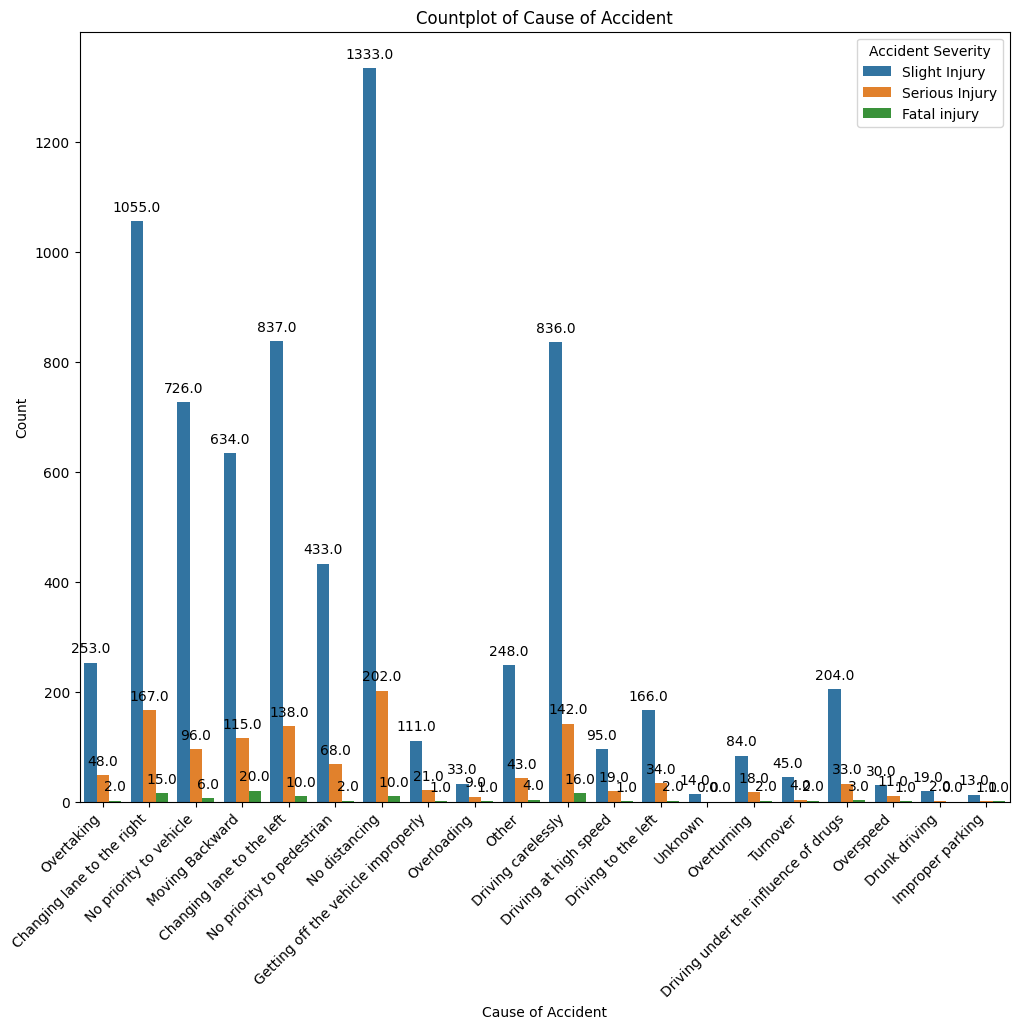

In [135]:
plt.figure(figsize=(12, 10))
ax = sns.countplot(x='Cause_of_accident', hue='Accident_severity', data=df)

# Adding labels on top of the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 10), 
                textcoords='offset points')

plt.title('Countplot of Cause of Accident')
plt.xlabel('Cause of Accident')
plt.ylabel('Count')
plt.legend(title='Accident Severity')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

plt.show()

# In conclusion we found that Males of Junior High School students mostly on friday are prone to accidents because of No distancing and changing the lane right to left causes the accident and occurs slightly injuries more often
# 